In [1]:
# SDA_과제#5_4조(신지운, 민영은, 장동규, 조민규)
# ONLY PULL AND PUSH 'SDA.ipynb'!
# 작업 후 Stash란 Summary에 성명을, Description에 작업 내용을 간단하게 요약해서 Commit 해주세요

In [2]:
# About Project
# 프로젝트 목표 : 미세먼지 농도의 변화는 대중교통 이용률에 영향을 미치는가?

# 각 Page별 목적을 여기에 간단히 정리해주세요
# Page는 항상 EDA - 가설검정 - 회귀분석 순서로 내림차순 정렬을 유지해주세요

# Page0 - 필요 패키지 설치
# Page1 - 데이터 년도 선정 과정 및 이유 -> 논의 중
# Page2 - 지하철-미세먼지 데이터 EDA(미세먼지, 지하철 이용인원 데이터 필터링, 시각화 및 데이터 병합 등)
# Page3 - 버스-미세먼지 데이터 EDA(미세먼지, 버스 이용인원 데이터 필터링, 시각화 및 데이터 병합 등)
# Page4 - 이상치 상세조사
# Page5 - EDA 결과 요약
# Page6 - 가설 설정과 정규성 검사
# Page7 - Kruskal test
# Page8 - 미세먼지 종류, 농도와 대중교통 이용인원간의 상관관계 분석
# Page9 - 

In [3]:
# Page0
# import package here!

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import glob
from scipy.stats import shapiro
from scipy.stats import kruskal
from scipy.stats import spearmanr

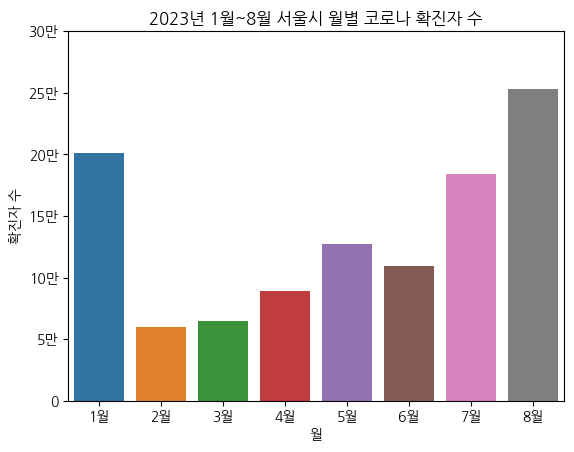

2023년 1월~8월 서울시 월별 코로나 평균 확진자 수: 136203 명


In [4]:
# Page1 - 데이터 년도 선정 과정 및 이유

# 코로나가 대중교통량에 영향을 줄 수도 있다고 판단
# 코로나 국내 첫 감염자 발생 날짜(2020-01-19), 사회적 거리두기 종료 날짜(2022-04-18) 고려
# 코로나 발생 전 연도인 2019년과 사회적 거리두기 종료 후 다음 년도인 2023년 둘 중 하나 선택
# 2023년도 서울시 월 평균 코로나 확진자 수를 확인 후 결정  -> 아예 코로나의 영향을 제외하기 위해 발병 전 가장 최근인 19년도로 선택했다는 어떤가요?
# -> 확진자 수가 영향을 주는지 정확히 잘모르기 때문에 코로나의 영향을 제외하기 전 가장 최신 데이터를 선택했다는 게 더 좋은 것 같습니다.

# 2023년도 서울시 1~8월 확진자수 확인(23년 9월부터 코로나 감염병이 4급으로 전환됨에 따라 데이터 업데이트 중단)
data_covid = pd.read_csv("질병관리청_코로나19 시군구별 월별 확진자 및 사망 발생 현황_20230831.csv")
seoul_covid = data_covid.iloc[1,42:50].values
months = ['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월']
seoul_covid_df = pd.DataFrame({'월': months, '확진자 수': [int(val.replace(',', '')) for val in seoul_covid]})
mpl.rcParams['font.family'] = 'NanumGothic'
sns.barplot(data=seoul_covid_df,x="월",y="확진자 수",hue="월")
plt.title("2023년 1월~8월 서울시 월별 코로나 확진자 수")
plt.yticks(ticks=range(0, 300001, 50000),labels=['0', '5만', '10만', '15만', '20만', '25만', '30만'])
plt.show()
print("2023년 1월~8월 서울시 월별 코로나 평균 확진자 수:",round(seoul_covid_df["확진자 수"].mean()),"명")

# 2023년 1월~8월 서울시 월별 평균 확진자 수: 136203
# 2023년 월평균 확진자 수가 13만명 이기에 2023년도 데이터가 아닌 2019년도 데이터로 결정

**19년도 서울시 자치구별, 시간별 미세먼지 데이터
                      일시   구분  미세먼지(PM10)  초미세먼지(PM25)
0       2019-12-31 23:00   평균        23.0         15.0
1       2019-12-31 23:00  강남구        19.0         15.0
2       2019-12-31 23:00  강동구        25.0         18.0
3       2019-12-31 23:00  강북구        25.0         16.0
4       2019-12-31 23:00  강서구        29.0         17.0
...                  ...  ...         ...          ...
227755   2019-01-01 0:00  용산구        31.0         22.0
227756   2019-01-01 0:00  은평구        35.0         23.0
227757   2019-01-01 0:00  종로구        36.0         21.0
227758   2019-01-01 0:00   중구        39.0         26.0
227759   2019-01-01 0:00  중랑구        36.0         26.0

[227760 rows x 4 columns]

**대중교통 운행 시간을 고려한 19년도 서울시 일별 미세먼지 데이터
             날짜  미세먼지(PM10)  초미세먼지(PM25)
0    2019-01-01       37.45        24.55
1    2019-01-02       35.55        22.90
2    2019-01-03       39.95        24.20
3    2019-01-04       61.05        42.25
4    2019-01-05       54.85        31.

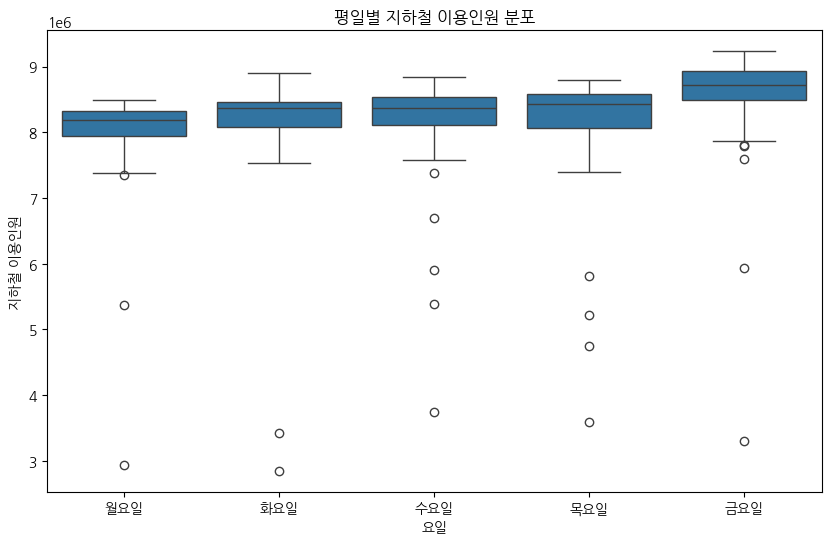

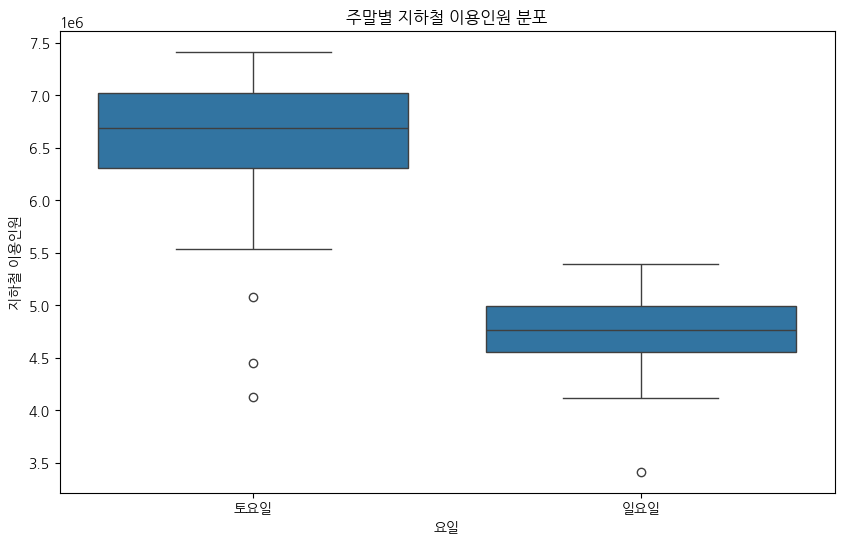

주말 데이터에서 특정 날짜 존재 여부:
Empty DataFrame
Columns: [날짜, 미세먼지(PM10), 초미세먼지(PM25), 미세먼지 등급, 초미세먼지 등급, 지하철이용인원, 요일, 요일구분]
Index: []
평일 데이터에서 특정 날짜 존재 여부:
            날짜  미세먼지(PM10)  초미세먼지(PM25) 미세먼지 등급 초미세먼지 등급  지하철이용인원   요일 요일구분
0   2019-01-01       37.45        24.55      보통       보통  3419948  화요일   평일
35  2019-02-05       90.05        28.15      나쁨       보통  2837335  화요일   평일
255 2019-09-13       14.50         6.45      좋음       좋음  3308479  금요일   평일
---------------after remove outlier--------------------
주말 데이터에서 특정 날짜 존재 여부:
Empty DataFrame
Columns: [날짜, 미세먼지(PM10), 초미세먼지(PM25), 미세먼지 등급, 초미세먼지 등급, 지하철이용인원, 요일, 요일구분]
Index: []
평일 데이터에서 특정 날짜 존재 여부:
Empty DataFrame
Columns: [날짜, 미세먼지(PM10), 초미세먼지(PM25), 미세먼지 등급, 초미세먼지 등급, 지하철이용인원, 요일, 요일구분]
Index: []


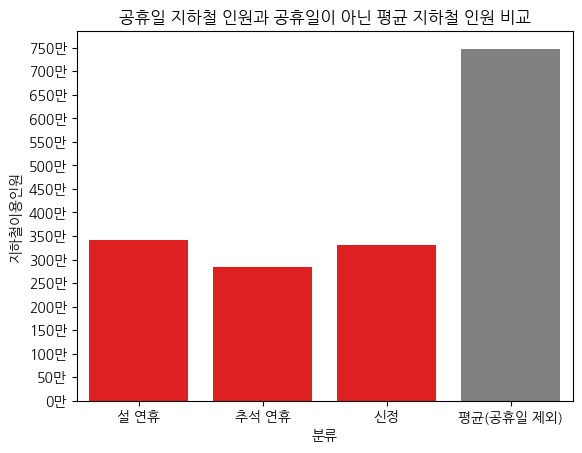

공휴일 평균 지하철이용 인원: 3188587
공휴일이 아닌 평균 지하철이용 인원: 7478289
공휴일이 공휴일이 아닌 평균 지하철 이용 인원의 약 0.43 배


**평일 미세먼지와 초미세먼지 boxplot


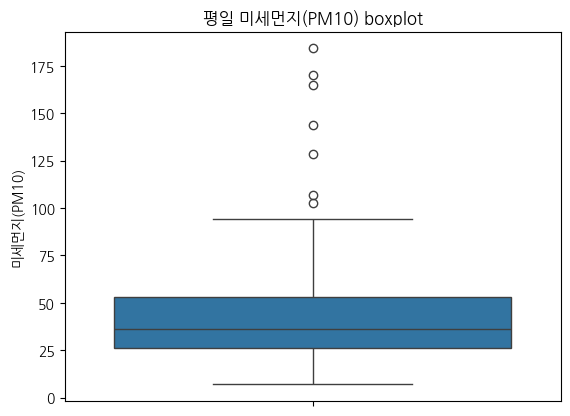

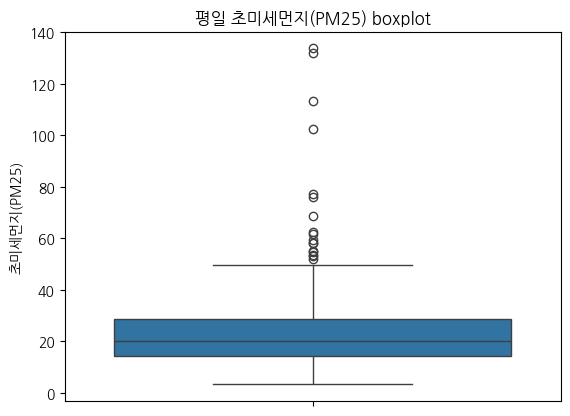


**주말 미세먼지와 초미세먼지 boxplot


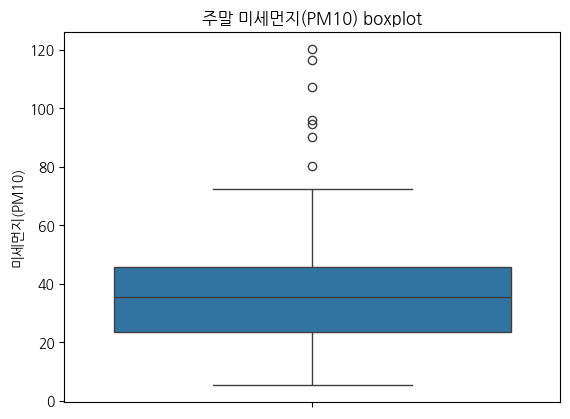

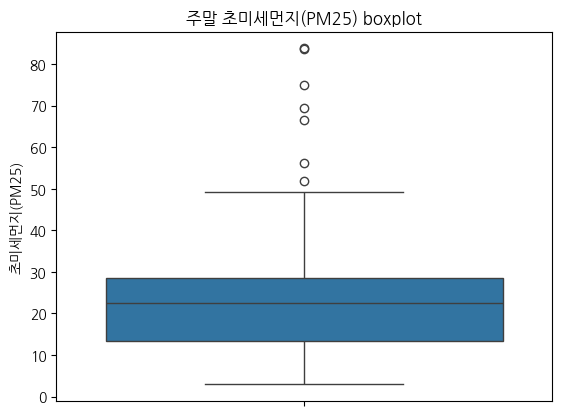


**평일 지하철 이용인원 boxplot


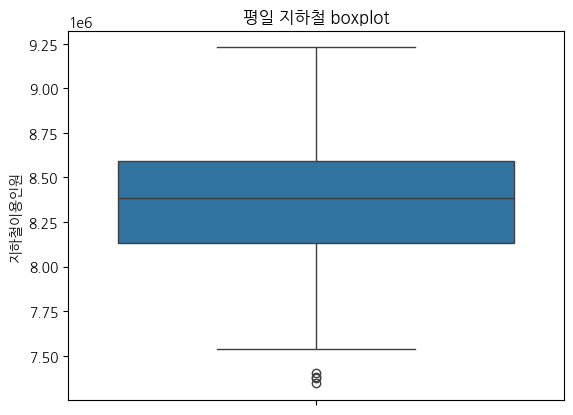


**주말 지하철 이용인원 boxplot


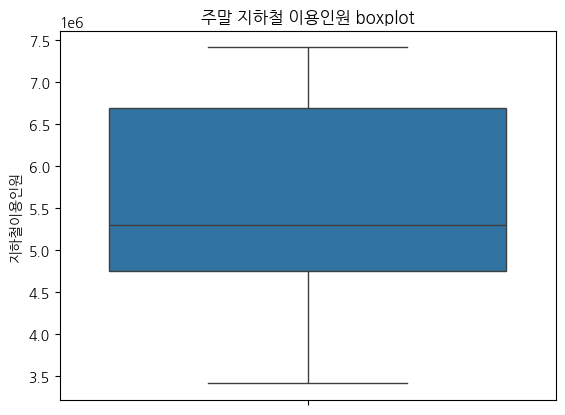

In [15]:
# Page2 - 데이터 준비(미세먼지, 지하철 이용인원 데이터 필터링, column생성 및 데이터 병합 등)

# 19년도 서울시 자치구별, 시간별 미세먼지 데이터 준비
air_df = pd.read_csv("서울시 대기질 자료 제공_2016-2019.csv")
air_df_19 = air_df[air_df['일시'].str.startswith('2019')].copy()
print("**19년도 서울시 자치구별, 시간별 미세먼지 데이터")
print(air_df_19)
#----------------------------------------------------------------------------------------------------

# 하루 미세먼지 농도를 모든 시간대의 평균값으로 사용?
# 대중교통은 새벽 시간대 운행 X, 첫차 시간과 막차 시간을 고려해서 새벽시간대의 미세먼지 데이터를 제거
# 나머지 시간대(05~24시)의 미세먼지 데이터의 평균 값을 하루 미세먼지의 값으로 사용
air_df_19['시간'] = pd.to_datetime(air_df_19['일시']).dt.hour.copy()
air_df_19 = air_df_19[(air_df_19['시간'] >= 5) | (air_df_19['시간'] == 0)]
air_df_19 = air_df_19[air_df_19["구분"] == "평균"].copy()
air_df_19['날짜'] = pd.to_datetime(air_df_19['일시']).dt.date
air_df_19 = air_df_19.groupby(['구분', '날짜'], as_index=False)[['미세먼지(PM10)', '초미세먼지(PM25)']].mean()
air_df_19["미세먼지(PM10)"] = round(air_df_19["미세먼지(PM10)"],2)
air_df_19["초미세먼지(PM25)"] = round(air_df_19["초미세먼지(PM25)"],2)
air_df_19.drop(columns=["구분"],inplace = True)
print("\n**대중교통 운행 시간을 고려한 19년도 서울시 일별 미세먼지 데이터")
print(air_df_19)
#----------------------------------------------------------------------------------------------------

# 미세먼지 농도에 따라 좋음,보통,나쁨,매우나쁨 추가
# 미세먼지(PM10) 기준(0~30: 좋음, 31~80: 보통, 81~150: 나쁨, 151이상: 매우나쁨)
# 초미세먼지(PM25) 기준(0~15: 좋음, 16~35: 보통, 36~75: 나쁨, 76이상: 매우나쁨
def categorize_pm10(value):
    if value <= 30:
        return "좋음"
    elif value <= 80:
        return "보통"
    elif value <= 150:
        return "나쁨"
    else:
        return "매우나쁨"
def categorize_pm25(value):
    if value <= 15:
        return "좋음"
    elif value <= 35:
        return "보통"
    elif value <= 75:
        return "나쁨"
    else:
        return "매우나쁨"
air_df_19["미세먼지 등급"] = air_df_19["미세먼지(PM10)"].apply(categorize_pm10)
air_df_19["초미세먼지 등급"] = air_df_19["초미세먼지(PM25)"].apply(categorize_pm25)
print("\n**미세먼지 농도에 따라 범주화")
print(air_df_19)
#----------------------------------------------------------------------------------------------------

# 19년도 서울시 지하철 이용인원 데이터 준비
sub_df_19 = pd.read_csv("CARD_SUBWAY_MONTH_2019.csv", encoding='euc-kr')
sub_df_19['날짜'] = pd.to_datetime(sub_df_19['사용일자'], format='%Y%m%d')
sub_df_19 = sub_df_19.groupby('날짜')['승차총승객수'].sum().reset_index()
sub_df_19.rename(columns={'승차총승객수': '지하철이용인원'}, inplace=True)
sub_df_19['지하철이용인원'] = sub_df_19['지하철이용인원'].astype(int)
print("\n**19년도 서울시 지하철이용인원")
print(sub_df_19)
#----------------------------------------------------------------------------------------------------

# 미세먼지와 지하철 이용인원 데이터 병합
air_df_19['날짜'] = pd.to_datetime(air_df_19['날짜'])
air_sub_19 = pd.merge(air_df_19, sub_df_19, on='날짜', how='inner')
print("\n**미세먼지, 지하철 이용인원 데이터 병합")
print(air_sub_19)
#----------------------------------------------------------------------------------------------------

# 평일과 주말(토,일) 구분을 위한 요일 column, 요일 구분 column 추가
air_sub_19['요일'] = air_sub_19['날짜'].dt.day_name(locale='ko_KR')
print("\n**평일과 주말(토,일)을 구분하기 위한 요일 column, 요일 구분 column추가")
air_sub_19['요일구분'] = air_sub_19['요일'].apply(lambda x: '주말' if x in ['토요일', '일요일'] else '평일')
print(air_sub_19,"\n")

#----------------------------------------------------------------------------------------------------

# 출퇴근 여부가 대중교통인원에 주는 영향을 고려 해 평일과 주말 데이터를 분리

# air_sub_19: 필터링한 미세먼지,지하철이용인원 전체 데이터
# air_sub_weekend_19: air_sub_19의 주말 데이터
# air_sub_weekday_19: air_sub_19의 평일 데이터
air_sub_weekend_19 = air_sub_19[air_sub_19["요일구분"]=="주말"]
air_sub_weekday_19 = air_sub_19[air_sub_19["요일구분"]=="평일"]
print("**주말 데이터")
print(air_sub_weekend_19)
print("\n**평일 데이터")
print(air_sub_weekday_19)

#----------------------------------------------------------------------------------------------------

# 평일과 주말 각각 데이터 분포 시각화. 이상치 확인

plt.figure(figsize=(10, 6))
sns.boxplot(x='요일', y='지하철이용인원', data=air_sub_weekday_19, order=['월요일', '화요일', '수요일', '목요일', '금요일'])
plt.title('평일별 지하철 이용인원 분포')
plt.xlabel('요일')
plt.ylabel('지하철 이용인원')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='요일', y='지하철이용인원', data=air_sub_weekend_19, order=['토요일', '일요일'])
plt.title('주말별 지하철 이용인원 분포')
plt.xlabel('요일')
plt.ylabel('지하철 이용인원')
plt.show()

#----------------------------------------------------------------------------------------------------

# 이상치 제거 및 공휴일 확인 -> 이상치를 확인해보고 그 이상치들 중 특정 공휴일의 값은 미세먼지의 영향에 의한 데이터가 아니기 때문에 삭제하는 게 맞는 것 같습니다.
# 근데 IQR값으로 확인했을 때 범위에 해당하는 모든 데이터를 삭제하는 건 조금 위험한 것 같습니다.
# 그 범위에 해당하는 값이 미세먼지가 아닌 다른 요소로 인해 값이 튄건지를 확인 후에 제거를 해야할 것 같습니다.
# 지금 당장 생각나는건 2019년도에 대중교통 파업이 언제였는지 확인 후에 만약 그 날짜가 IQR값으로 확인 했던 범위에 있는 이상치라면 제거하는 식으로 진행하는 방법이 있을 것 같습니다. 

specific_dates = ['2019-02-05', '2019-09-13', '2019-01-01'] #확인해볼 공휴일
weekend_check = air_sub_weekend_19[air_sub_weekend_19['날짜'].isin(pd.to_datetime(specific_dates))]
weekday_check = air_sub_weekday_19[air_sub_weekday_19['날짜'].isin(pd.to_datetime(specific_dates))]

print("주말 데이터에서 특정 날짜 존재 여부:")
print(weekend_check)

print("평일 데이터에서 특정 날짜 존재 여부:")
print(weekday_check)

print("---------------after remove outlier--------------------")

def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)  # 1사분위수
    Q3 = data[column].quantile(0.75)  # 3사분위수
    IQR = Q3 - Q1  # IQR 계산
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return filtered_data

air_sub_weekend_cleaned = remove_outliers(air_sub_weekend_19, '지하철이용인원')
air_sub_weekday_cleaned = remove_outliers(air_sub_weekday_19, '지하철이용인원')

weekend_check = air_sub_weekend_cleaned[air_sub_weekend_cleaned['날짜'].isin(pd.to_datetime(specific_dates))]
weekday_check = air_sub_weekday_cleaned[air_sub_weekday_cleaned['날짜'].isin(pd.to_datetime(specific_dates))]

print("주말 데이터에서 특정 날짜 존재 여부:")
print(weekend_check)

print("평일 데이터에서 특정 날짜 존재 여부:")
print(weekday_check)

#----------------------------------------------------------------------------------------------------

# 특정 공휴일(설 연휴, 추석 연휴, 신정)이 대중교통이용인원에 다른 값을 보이는지 barplot을 이용하여 시각화
# 설 연휴: 2019/02/05, 추석 연휴: 2019/9/13, 신정: 2019/01/01
holidays = ['2019-02-05', '2019-09-13', '2019-01-01']
holidays = pd.to_datetime(holidays)
holiday_data = air_sub_19[air_sub_19['날짜'].isin(holidays)][['날짜', '지하철이용인원']]
average_non_holiday = air_sub_19[~air_sub_19['날짜'].isin(holidays)]['지하철이용인원'].mean()
bar_data = pd.DataFrame({'분류': ['설 연휴', '추석 연휴', '신정', '평균(공휴일 제외)'],
    '지하철이용인원': list(holiday_data['지하철이용인원']) + [average_non_holiday]})
sns.barplot(data = bar_data, x = "분류", y = "지하철이용인원", palette=["red","red","red","gray"],hue="분류")
max_value = bar_data['지하철이용인원'].max()
step = 500000  
plt.yticks(ticks=range(0, int(max_value) + step, step),labels=[f'{x//10000}만' for x in range(0, int(max_value) + step, step)])
plt.title("공휴일 지하철 인원과 공휴일이 아닌 평균 지하철 인원 비교")
plt.show()
print("공휴일 평균 지하철이용 인원:",round(holiday_data["지하철이용인원"].mean()))
print("공휴일이 아닌 평균 지하철이용 인원:",round(average_non_holiday))
print("공휴일이 공휴일이 아닌 평균 지하철 이용 인원의 약",round(holiday_data["지하철이용인원"].mean()/(average_non_holiday),2),
      "배\n")

#----------------------------------------------------------------------------------------------------------

#boxplot에 따른 토요일, 일요일 구분

air_sub_weekend_cleaned_sat = air_sub_weekend_cleaned[air_sub_weekend_cleaned["요일"]=="토요일"]
air_sub_weekend_cleaned_sun = air_sub_weekend_cleaned[air_sub_weekend_cleaned["요일"]=="일요일"]

air_sub_weekend_cleaned_sat.head()
air_sub_weekend_cleaned_sun.head()

#-------------------------------------------------------
# 주말과 평일을 구분해서 미세먼지분포와 지하철 이용인원 boxplot
print("\n**평일 미세먼지와 초미세먼지 boxplot")
sns.boxplot(air_sub_weekday_cleaned["미세먼지(PM10)"])
plt.title("평일 미세먼지(PM10) boxplot")
plt.show()
sns.boxplot(air_sub_weekday_cleaned["초미세먼지(PM25)"])
plt.title("평일 초미세먼지(PM25) boxplot")
plt.show()

print("\n**주말 미세먼지와 초미세먼지 boxplot")
sns.boxplot(air_sub_weekend_cleaned["미세먼지(PM10)"])
plt.title("주말 미세먼지(PM10) boxplot")
plt.show()
sns.boxplot(air_sub_weekend_cleaned["초미세먼지(PM25)"])
plt.title("주말 초미세먼지(PM25) boxplot")
plt.show()

print("\n**평일 지하철 이용인원 boxplot")
sns.boxplot(air_sub_weekday_cleaned["지하철이용인원"])
plt.title("평일 지하철 boxplot")
plt.show()

print("\n**주말 지하철 이용인원 boxplot")
sns.boxplot(air_sub_weekend_cleaned["지하철이용인원"])
plt.title("주말 지하철 이용인원 boxplot")
plt.show()

            날짜   버스이용인원
0   2019-01-01  2421369
1   2019-01-02  5328586
2   2019-01-03  5457074
3   2019-01-04  5613975
4   2019-01-05  4050127
..         ...      ...
360 2019-12-27  5930615
361 2019-12-28  4270697
362 2019-12-29  3239593
363 2019-12-30  5593464
364 2019-12-31  5396759

[365 rows x 2 columns]

**미세먼지, 버스이용인원 데이터 병합
            날짜  미세먼지(PM10)  초미세먼지(PM25) 미세먼지 등급 초미세먼지 등급   버스이용인원
0   2019-01-01       37.45        24.55      보통       보통  2421369
1   2019-01-02       35.55        22.90      보통       보통  5328586
2   2019-01-03       39.95        24.20      보통       보통  5457074
3   2019-01-04       61.05        42.25      보통       나쁨  5613975
4   2019-01-05       54.85        31.35      보통       보통  4050127
..         ...         ...          ...     ...      ...      ...
360 2019-12-27       34.80        23.65      보통       보통  5930615
361 2019-12-28       43.65        25.85      보통       보통  4270697
362 2019-12-29       44.30        27.10      보통       보통  3239593
363 2

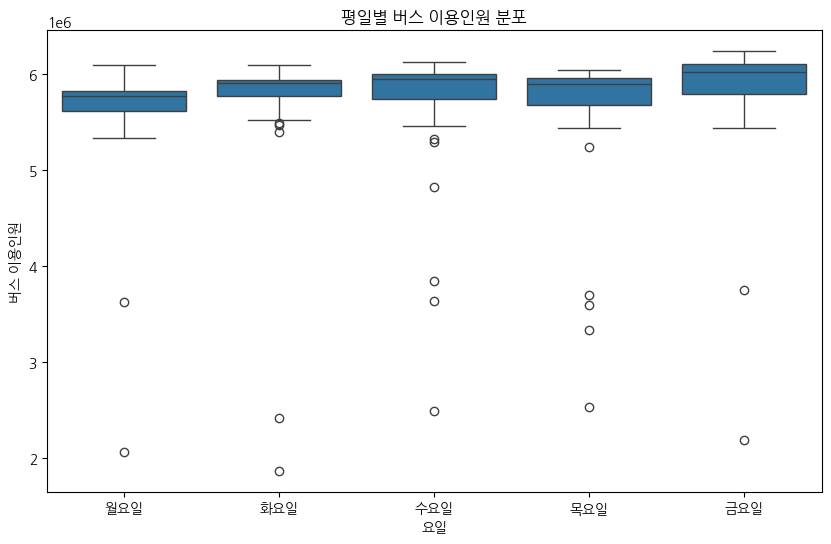

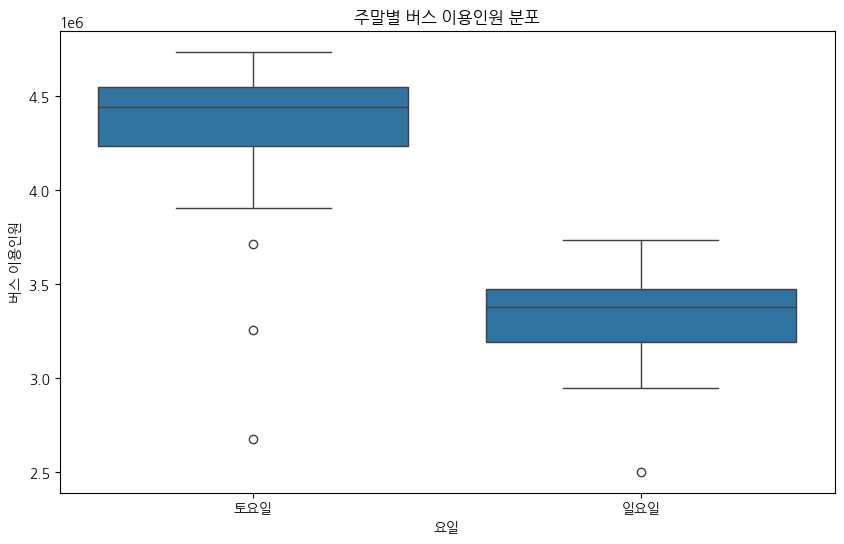

주말 데이터에서 특정 날짜 존재 여부:
Empty DataFrame
Columns: [날짜, 미세먼지(PM10), 초미세먼지(PM25), 미세먼지 등급, 초미세먼지 등급, 버스이용인원, 요일, 요일구분]
Index: []
평일 데이터에서 특정 날짜 존재 여부:
            날짜  미세먼지(PM10)  초미세먼지(PM25) 미세먼지 등급 초미세먼지 등급   버스이용인원   요일 요일구분
0   2019-01-01       37.45        24.55      보통       보통  2421369  화요일   평일
35  2019-02-05       90.05        28.15      나쁨       보통  1862627  화요일   평일
255 2019-09-13       14.50         6.45      좋음       좋음  2188402  금요일   평일
---------------after remove outlier--------------------
주말 데이터에서 특정 날짜 존재 여부:
Empty DataFrame
Columns: [날짜, 미세먼지(PM10), 초미세먼지(PM25), 미세먼지 등급, 초미세먼지 등급, 버스이용인원, 요일, 요일구분]
Index: []
평일 데이터에서 특정 날짜 존재 여부:
Empty DataFrame
Columns: [날짜, 미세먼지(PM10), 초미세먼지(PM25), 미세먼지 등급, 초미세먼지 등급, 버스이용인원, 요일, 요일구분]
Index: []


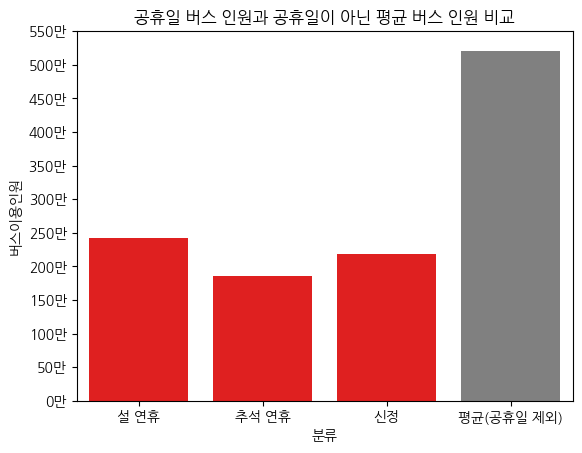

공휴일 평균 버스 이용 인원: 2157466
공휴일이 아닌 평균 버스이용 인원: 5200975
공휴일이 공휴일이 아닌 평균 버스 이용 인원의 약 0.41 배


**평일 버스 이용인원 boxplot


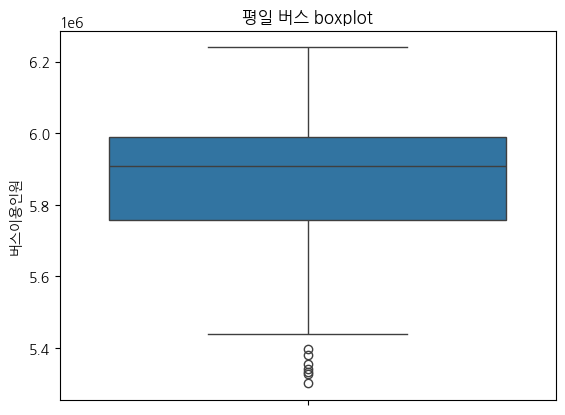


**주말 버스 이용인원 boxplot


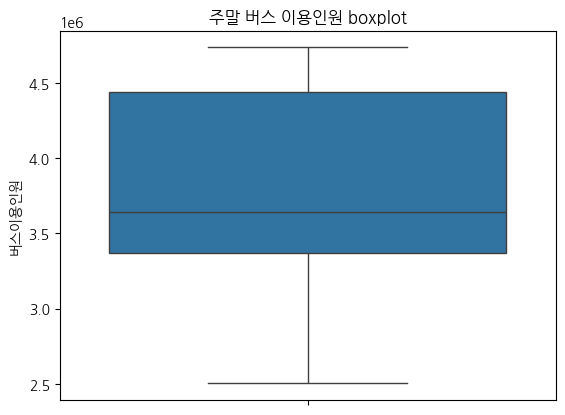

In [16]:
# Page3 - 버스 데이터도 page2의 지하철과 같은 과정으로 진행

# 19년도 서울시 버스 이용인원 데이터 준비

# 12개의 csv파일 통합 및 요약
file_path = 'Bus/*.csv'
all_files = glob.glob(file_path)

dfs = []
for file in all_files:
    df = pd.read_csv(file, encoding='euc-kr')
    dfs.append(df)

merged_df = pd.concat(dfs, ignore_index=True)
merged_df['날짜'] = pd.to_datetime(merged_df['사용일자'], format='%Y%m%d')
bus_df_19 = merged_df.sort_values(by='날짜')
bus_df_19 = bus_df_19[['날짜', '승차총승객수']]
bus_df_19 = bus_df_19.rename(columns={'승차총승객수': '버스이용인원'})
bus_df_19 = bus_df_19.groupby('날짜')['버스이용인원'].sum().reset_index()

print(bus_df_19)

#----------------------------------------------------------------------------------------------------

# 미세먼지와 버스이용인원 데이터 병합
air_bus_19 = pd.merge(air_df_19, bus_df_19, on='날짜', how='inner')
print("\n**미세먼지, 버스이용인원 데이터 병합")
print(air_bus_19)
#----------------------------------------------------------------------------------------------------

# 평일과 주말(토,일) 구분을 위한 요일 column, 요일 구분 column 추가
air_bus_19['요일'] = air_bus_19['날짜'].dt.day_name(locale='ko_KR')
print("\n**평일과 주말(토,일)을 구분하기 위한 요일 column, 요일 구분 column추가")
air_bus_19['요일구분'] = air_bus_19['요일'].apply(lambda x: '주말' if x in ['토요일', '일요일'] else '평일')
print(air_bus_19,"\n")

#----------------------------------------------------------------------------------------------------

# 출퇴근 여부가 버스이용인원에 주는 영향을 고려 해 평일과 주말 데이터를 분리

air_bus_weekend_19 = air_bus_19[air_bus_19["요일구분"]=="주말"]
air_bus_weekday_19 = air_bus_19[air_bus_19["요일구분"]=="평일"]
print("**주말 데이터")
print(air_bus_weekend_19)
print("\n**평일 데이터")
print(air_bus_weekday_19)

#----------------------------------------------------------------------------------------------------

# 평일과 주말 각각 데이터 분포 시각화. 이상치 확인

plt.figure(figsize=(10, 6))
sns.boxplot(x='요일', y='버스이용인원', data=air_bus_weekday_19, order=['월요일', '화요일', '수요일', '목요일', '금요일'])
plt.title('평일별 버스 이용인원 분포')
plt.xlabel('요일')
plt.ylabel('버스 이용인원')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='요일', y='버스이용인원', data=air_bus_weekend_19, order=['토요일', '일요일'])
plt.title('주말별 버스 이용인원 분포')
plt.xlabel('요일')
plt.ylabel('버스 이용인원')
plt.show()

#----------------------------------------------------------------------------------------------------

# 이상치 제거 및 공휴일 확인 -> 이상치를 확인해보고 그 이상치들 중 특정 공휴일의 값은 미세먼지의 영향에 의한 데이터가 아니기 때문에 삭제하는 게 맞는 것 같습니다.
# 근데 IQR값으로 확인했을 때 범위에 해당하는 모든 데이터를 삭제하는 건 조금 위험한 것 같습니다.
# 그 범위에 해당하는 값이 미세먼지가 아닌 다른 요소로 인해 값이 튄건지를 확인 후에 제거를 해야할 것 같습니다.
# 지금 당장 생각나는건 2019년도에 대중교통 파업이 언제였는지 확인 후에  만약 그 날짜가 IQR값으로 확인 했던 범위에 있는 이상치라면 제거하는 식으로 진행하는 방법이 있을 것 같습니다.

specific_dates = ['2019-02-05', '2019-09-13', '2019-01-01'] #확인해볼 공휴일
weekend_check = air_bus_weekend_19[air_bus_weekend_19['날짜'].isin(pd.to_datetime(specific_dates))]
weekday_check = air_bus_weekday_19[air_bus_weekday_19['날짜'].isin(pd.to_datetime(specific_dates))]

print("주말 데이터에서 특정 날짜 존재 여부:")
print(weekend_check)

print("평일 데이터에서 특정 날짜 존재 여부:")
print(weekday_check)

print("---------------after remove outlier--------------------")

air_bus_weekend_cleaned = remove_outliers(air_bus_weekend_19, '버스이용인원')
air_bus_weekday_cleaned = remove_outliers(air_bus_weekday_19, '버스이용인원')

weekend_check = air_bus_weekend_cleaned[air_bus_weekend_cleaned['날짜'].isin(pd.to_datetime(specific_dates))]
weekday_check = air_bus_weekday_cleaned[air_bus_weekday_cleaned['날짜'].isin(pd.to_datetime(specific_dates))]

print("주말 데이터에서 특정 날짜 존재 여부:")
print(weekend_check)

print("평일 데이터에서 특정 날짜 존재 여부:")
print(weekday_check)

#----------------------------------------------------------------------------------------------------

# 특정 공휴일(설 연휴, 추석 연휴, 신정)이 대중교통이용인원에 다른 값을 보이는지 barplot을 이용하여 시각화
# 설 연휴: 2019/02/05, 추석 연휴: 2019/9/13, 신정: 2019/01/01
holidays = ['2019-02-05', '2019-09-13', '2019-01-01']
holidays = pd.to_datetime(holidays)
holiday_data = air_bus_19[air_bus_19['날짜'].isin(holidays)][['날짜', '버스이용인원']]
average_non_holiday = air_bus_19[~air_bus_19['날짜'].isin(holidays)]['버스이용인원'].mean()
bar_data = pd.DataFrame({'분류': ['설 연휴', '추석 연휴', '신정', '평균(공휴일 제외)'],
    '버스이용인원': list(holiday_data['버스이용인원']) + [average_non_holiday]})
sns.barplot(data = bar_data, x = "분류", y = "버스이용인원", palette=["red","red","red","gray"],hue="분류")
max_value = bar_data['버스이용인원'].max()
step = 500000  
plt.yticks(ticks=range(0, int(max_value) + step, step),labels=[f'{x//10000}만' for x in range(0, int(max_value) + step, step)])
plt.title("공휴일 버스 인원과 공휴일이 아닌 평균 버스 인원 비교")
plt.show()
print("공휴일 평균 버스 이용 인원:",round(holiday_data["버스이용인원"].mean()))
print("공휴일이 아닌 평균 버스이용 인원:",round(average_non_holiday))
print("공휴일이 공휴일이 아닌 평균 버스 이용 인원의 약",round(holiday_data["버스이용인원"].mean()/(average_non_holiday),2),
      "배\n")

#----------------------------------------------------------------------------------------------------------

#boxplot에 따른 토요일, 일요일 구분

air_bus_weekend_cleaned_sat = air_bus_weekend_cleaned[air_bus_weekend_cleaned["요일"]=="토요일"]
air_bus_weekend_cleaned_sun = air_bus_weekend_cleaned[air_bus_weekend_cleaned["요일"]=="일요일"]

air_bus_weekend_cleaned_sat.head()
air_bus_weekend_cleaned_sun.head()

#-----------------------------------------------------------------------------

# 주말과 평일을 구분해서 미세먼지분포와 버스 이용인원 boxplot
print("\n**평일 버스 이용인원 boxplot")
sns.boxplot(air_bus_weekday_cleaned["버스이용인원"])
plt.title("평일 버스 boxplot")
plt.show()

print("\n**주말 버스 이용인원 boxplot")
sns.boxplot(air_bus_weekend_cleaned["버스이용인원"])
plt.title("주말 버스 이용인원 boxplot")
plt.show()

In [7]:
# Page4 - 이상치에 관한 상세조사
# eda 진행 중 논의를 거쳐 이상값의 단순 제거가 아닌 어떠한 데이터로 구성되어 있는 지 파악해보기로 하였다.

def catch_outliers(data, column):
    Q1 = data[column].quantile(0.25)  # 1사분위수
    Q3 = data[column].quantile(0.75)  # 3사분위수
    IQR = Q3 - Q1  # IQR 계산
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    filtered_data = data[(data[column] <= lower_bound) | (data[column] >= upper_bound)]
    return filtered_data

air_sub_weekend_outonly = catch_outliers(air_sub_weekend_19, '지하철이용인원')
air_sub_weekday_outonly = catch_outliers(air_sub_weekday_19, '지하철이용인원')
air_bus_weekend_outonly = catch_outliers(air_bus_weekend_19, '버스이용인원')
air_bus_weekday_outonly = catch_outliers(air_bus_weekday_19, '버스이용인원')

print(air_sub_weekend_outonly)
print("------------------------------------------------------------------")
print(air_sub_weekday_outonly)
print("------------------------------------------------------------------")
print(air_bus_weekend_outonly)
print("------------------------------------------------------------------")
print(air_bus_weekday_outonly)

# 결과 : 이상치가 전부 공휴일이나 대체휴일로만 존재한다. 대중교통의 이용량은 왠만한 원인에 대해선 큰 영향을 받지 않는 모습을 보인다.

Empty DataFrame
Columns: [날짜, 미세먼지(PM10), 초미세먼지(PM25), 미세먼지 등급, 초미세먼지 등급, 지하철이용인원, 요일, 요일구분]
Index: []
------------------------------------------------------------------
            날짜  미세먼지(PM10)  초미세먼지(PM25) 미세먼지 등급 초미세먼지 등급  지하철이용인원   요일 요일구분
0   2019-01-01       37.45        24.55      보통       보통  3419948  화요일   평일
34  2019-02-04       62.40        31.40      보통       보통  2941955  월요일   평일
35  2019-02-05       90.05        28.15      나쁨       보통  2837335  화요일   평일
36  2019-02-06       94.00        33.40      나쁨       보통  3741895  수요일   평일
59  2019-03-01      121.05        84.45      나쁨     매우나쁨  5930573  금요일   평일
120 2019-05-01       65.65        29.30      보통       보통  6694473  수요일   평일
125 2019-05-06       35.15        10.60      보통       좋음  5369332  월요일   평일
156 2019-06-06       63.70        45.40      보통       나쁨  5214097  목요일   평일
226 2019-08-15        8.00         4.30      좋음       좋음  4754066  목요일   평일
254 2019-09-12       12.20         5.30      좋음       좋음  3582721  목요일

# Page5 - EDA 결과 요약

# 기간 설정 : 2019년
# -> 코로나 19는 사회 전반에 미친 영향도 컸고 그 기간 또한 광범위하여 쉽게 통제하기 힘든 noise로 판단된다. 실제로 코로나가 극성이던 시기엔 사람들이 외출을 많이 꺼렸지만 그동안 중국의 공장 가동 중단으로
# 미세먼지가 크게 감소된 사례또한 존재한다. 이에 코로나의 영향을 적절히 조절할 방법을 찾기 힘들다고 결론짓고 코로나에 영향을 받지 않은 기간 중 가장 최근인 2019년의 데이터를 기반으로 조사를 진행한다.

# 데이터 시간 단위 설정 : 일(day)
# 하루 내에서 대중교통의 이용량은 시간에 따라 영향을 강하게 받는다. 대표적으로 출퇴근이 있다. 이에 하루를 데이터의 단위로 정한다. 이는 reference한 연구의 방법하고도 동일하다.

# 제외시간 : 01시 ~ 04시
# 대중교통이 운행하지 않는 시간대의 미세먼지 데이터는 조사 목적를 방해하는 요인으로 작용할 것이다. 이에 해당 시간의 데이터는 제외하고 나머지 시간에 대한 데이터의 평균으로 해당 날짜의 데이터를 정한다.

# 평일-주말 구분
# 대중교통의 이용패턴은 평일과 주말간에 차이가 극명하게 나타난다. 이는 위에 boxplot 시각화를 통한 데이터 분포의 차이로 나타나기도 하였다. 이에 평일과 주말을 분리하여 조사를 진행한다.

# 토요일-일요일 구분
# 추가적인 조사 결과 주말 내에서도 위의 평일-주말과 같이 데이터 분포의 차이가 나타났다. 이에 토요일과 일요일 또한 분리하여 조사를 진행한다.

# 버스-지하철 구분
# 같은 대중교통의 범주에 속한다고 미세먼지의 영향을 동일하게 받는다고 단정 지을 수 없다. 운행 환경의 차이 등 여러 요소를 고려하여 이 둘의 교통수단 또한 분리하여 조사를 진행한다.

# 대중교통 이용 수 이상값 제거 처리
# boxplot을 통해 이상값의 존재를 파악하고 따로 분리하여 확인(page4)해 보았다. 결과는 모든 이상값은 공휴일과 대체휴일에 한정되었다. 해당 기간의 변화는 미세먼지의 영향하고는 무관한바, 제거하여 조사를 진행한다.

# 최종적 조사 종류
# 1. 미세먼지가 버스 이용에 미치는 영향(평일) : DF = 'air_bus_weekday_cleaned' / Col = '버스이용인원' [integer]
# 2. 미세먼지가 버스 이용에 미치는 영향(토요일) : DF = 'air_bus_weekend_cleaned_sat' / Col = '버스이용인원' [integer]
# 3. 미세먼지가 버스 이용에 미치는 영향(일요일) : DF = 'air_bus_weekend_cleaned_sun' / Col = '버스이용인원' [integer]
# 4. 미세먼지가 지하철 이용에 미치는 영향(평일) : DF = 'air_sub_weekday_cleaned' / Col = '지하철이용인원' [integer]
# 5. 미세먼지가 지하철 이용에 미치는 영향(토요일) : DF = 'air_sub_weekend_cleaned_sat' / Col = '지하철이용인원' [integer]
# 6. 미세먼지가 지하철 이용에 미치는 영향(일요일) : DF = 'air_sub_weekend_cleaned_sun' / Col = '지하철이용인원' [integer]

# 추가 DATAFRAME 공통 Column
# => '날짜' [yyyymmdd형식(datetime)]
# => '미세먼지(PM10)' [float]
# => '초미세먼지(PM25)' [float]
# => '미세먼지 등급' [좋음, 보통, 나쁨(string)]
# => '초미세먼지 등급' [좋음, 보통, 나쁨(string)]
# => '요일' [월요일, 화요일, 수요일, 목요일, 금요일, 토요일, 일요일(string)]
# => '요일구분' [평일, 주말(string)]


In [8]:
# Page6
#가설 검정 시작
# H0(귀무가설)- 미세먼지 (Pm 10, Pm2.5)의 등급에 따른 대중교통 이용률에 영향을 미치지 않는다
# H1(대립가설)- 미세먼지 (Pm 10, Pm2.5)의 등급에 따른 대중교통 이용률에 영향을 미친다.

# 데이터들의 정규성 확인


# 정규성 검사
def test_normality_by_pm_level(dataset, pm_column, value_column):
    grouped_data = dataset.groupby(pm_column)
    results = {}
    for level, group in grouped_data:
        if len(group) > 1: 
            stat, p_value = shapiro(group[value_column])
            conclusion = "Normal" if p_value >= 0.05 else "Not Normal"
            results[level] = {"Statistic": stat, "p-value": p_value, "Conclusion": conclusion}
        else:
            results[level] = {"Statistic": None, "p-value": None, "Conclusion": "Insufficient Data"}
    return pd.DataFrame(results).T

#  PM10 등급에 따른 평일 버스 이용인원
pm10_normality_results = test_normality_by_pm_level(
    air_bus_weekday_cleaned, "미세먼지 등급", "버스이용인원"
)

# PM2.5 등급에 따른 평일 버스 이용인원
pm25_normality_results = test_normality_by_pm_level(
    air_bus_weekday_cleaned, "초미세먼지 등급", "버스이용인원"
)

# Display results
print("PM10 Normality Test Results")
print(pm10_normality_results)

print("\nPM2.5 Normality Test Results")
print(pm25_normality_results)

#대부분의 데이터가 정규분포를 따르지 않음-> kruskal 진행

PM10 Normality Test Results
     Statistic   p-value  Conclusion
나쁨    0.953546  0.483316      Normal
매우나쁨  0.792694  0.097174      Normal
보통    0.934602  0.000006  Not Normal
좋음    0.954679  0.003518  Not Normal

PM2.5 Normality Test Results
     Statistic   p-value  Conclusion
나쁨    0.971567  0.452455      Normal
매우나쁨  0.782785  0.040915  Not Normal
보통    0.942334  0.000023  Not Normal
좋음    0.934558  0.001341  Not Normal


PM10 Kruskal-Wallis Test
Statistic = 0.6801915156109999, p-value = 0.8778529165135515


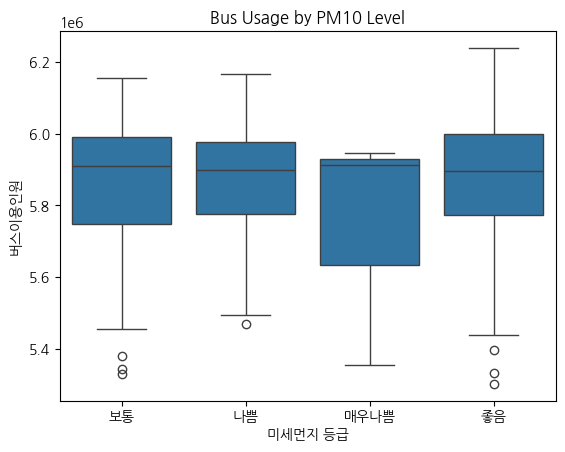



PM2.5 Kruskal-Wallis Test
Statistic = 0.7599300108663556, p-value = 0.8590252373846743


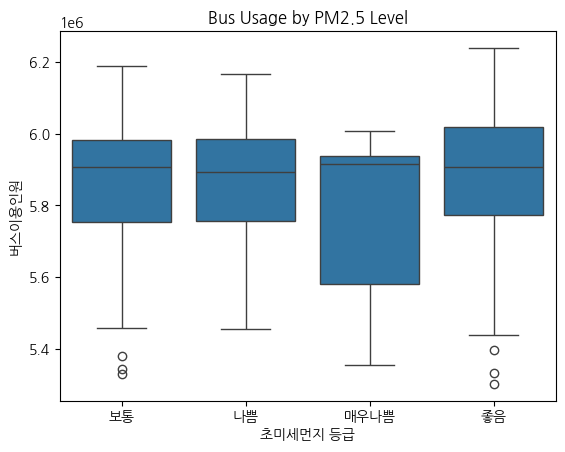

미세먼지 등급
나쁨       18
매우나쁨      3
보통      136
좋음       89
dtype: int64 

초미세먼지 등급
나쁨       37
매우나쁨      6
보통      134
좋음       69
dtype: int64 

매우 나쁨 제거한 PM2.5 Kruskal-Wallis Test
Statistic = 0.27077816215603434, p-value = 0.8733760314839999
Spearman Correlation: Statistic = -0.022261025367688283, p-value = 0.7315169499628557 

초미세먼지 등급 (결합)
나쁨 이상     43
보통       134
좋음        69
dtype: int64 

매우나쁨+ 나쁨 합친 PM2.5 Kruskal-Wallis Test
Statistic = 0.23106859153733694, p-value = 0.890890017955175
Spearman Correlation (PM2.5 Combined Levels): Correlation = -0.032213235141395055, p-value = 0.6151034546782201


In [9]:
# Page7
#먼저 air_bus_weekday_cleaned 평일 데이터를 가지고 분석

pm10_groups = [
    air_bus_weekday_cleaned[air_bus_weekday_cleaned["미세먼지 등급"] == level]["버스이용인원"]
    for level in air_bus_weekday_cleaned["미세먼지 등급"].unique()
]

# PM10 등급에 따른 대중교통 이용량의 차이를 일기 위해 Kruskal-Wallis H test
kruskal_stat, kruskal_p = kruskal(*pm10_groups)

print("PM10 Kruskal-Wallis Test")
print(f"Statistic = {kruskal_stat}, p-value = {kruskal_p}")

sns.boxplot(data=air_bus_weekday_cleaned, x="미세먼지 등급", y="버스이용인원")
plt.title("Bus Usage by PM10 Level")
plt.show()

print("\n")

# PM2.5일때 등급에 따른 버스이용인원
pm25_groups = [
    air_bus_weekday_cleaned[air_bus_weekday_cleaned["초미세먼지 등급"] == level]["버스이용인원"]
    for level in air_bus_weekday_cleaned["초미세먼지 등급"].unique()
]

# Perform Kruskal-Wallis Test
kruskal_stat, kruskal_p = kruskal(*pm25_groups)
print("PM2.5 Kruskal-Wallis Test")
print(f"Statistic = {kruskal_stat}, p-value = {kruskal_p}")


sns.boxplot(data=air_bus_weekday_cleaned, x="초미세먼지 등급", y="버스이용인원")
plt.title("Bus Usage by PM2.5 Level")
plt.show()


# 둘다 pvalue가 0.05보다 커가지고 찍어보니 매우 나쁨 표본이 매우 적음
print(air_bus_weekday_cleaned.groupby("미세먼지 등급").size(), "\n")
print(air_bus_weekday_cleaned.groupby("초미세먼지 등급").size(), "\n")



#pm2.5에 대해 매우나쁨 등급을 일단 제거해보면 어떨까?-> 

filtered_data = air_bus_weekday_cleaned[air_bus_weekday_cleaned["초미세먼지 등급"] != "매우나쁨"]

pm25_groups_filtered = [
    filtered_data[filtered_data["초미세먼지 등급"] == level]["버스이용인원"]
    for level in filtered_data["초미세먼지 등급"].unique()
]

kruskal_stat, kruskal_p = kruskal(*pm25_groups_filtered)
print("매우 나쁨 제거한 PM2.5 Kruskal-Wallis Test")
print(f"Statistic = {kruskal_stat}, p-value = {kruskal_p}")

stat, p_value = spearmanr(filtered_data["초미세먼지(PM25)"], filtered_data["버스이용인원"])
print(f"Spearman Correlation: Statistic = {stat}, p-value = {p_value} \n")



# "나쁨"과 "매우나쁨" 묶어보기
def combine_pm_levels(row):
    if row in ["나쁨", "매우나쁨"]:
        return "나쁨 이상"
    else:
        return row

# PM2.5 등급 업데이트
air_bus_weekday_cleaned = air_bus_weekday_cleaned.copy()  # 복사본 생성
air_bus_weekday_cleaned["초미세먼지 등급 (결합)"] = air_bus_weekday_cleaned["초미세먼지 등급"].apply(combine_pm_levels)

# 데이터 크기 확인
print(air_bus_weekday_cleaned.groupby("초미세먼지 등급 (결합)").size(), "\n")

# PM2.5 결합 등급별 데이터 그룹화
pm25_combined_groups = [
    air_bus_weekday_cleaned[air_bus_weekday_cleaned["초미세먼지 등급 (결합)"] == level]["버스이용인원"]
    for level in air_bus_weekday_cleaned["초미세먼지 등급 (결합)"].unique()
]

# Kruskal-Wallis Test
kruskal_stat, kruskal_p = kruskal(*pm25_combined_groups)

print("매우나쁨+ 나쁨 합친 PM2.5 Kruskal-Wallis Test")
print(f"Statistic = {kruskal_stat}, p-value = {kruskal_p}")

# PM2.5 농도와 이용량 간 Spearman Correlation
correlation, p_value = spearmanr(
    air_bus_weekday_cleaned["초미세먼지(PM25)"], air_bus_weekday_cleaned["버스이용인원"]
)

print(f"Spearman Correlation (PM2.5 Combined Levels): Correlation = {correlation}, p-value = {p_value}")

#Pm10일때 미세먼지 등급에 따른 버스이용인원 차이가 존재하는가?->Statistic = 0.6801915156109999, p-value = 0.8778529165135515  로 기각
#Pm2.5일때 미세먼지 등급에 따른 버스이용인원 차이가 존재하는가?->Statistic = 0.7599300108663556, p-value = 0.8590252373846743 로 기각
#2.5 기준으로 매우 나쁨 제거한 PM2.5 Kruskal-Wallis Test-> Statistic = 0.27077816215603434, p-value = 0.8733760314839999 로 기각
#매우나쁨+ 나쁨 합친 PM2.5 Kruskal-Wallis Test->0.23106859153733694, p-value = 0.890890017955175 로 기각


In [10]:
# Page8 궁금해가지고 찍어본 미세먼지 등급별이 아닌 농도별 이용 인원과 상관관계
# PM10 and bus usage correlation
pm10_bus_corr, pm10_bus_p = spearmanr(
    air_bus_weekday_cleaned["미세먼지(PM10)"], air_bus_weekday_cleaned["버스이용인원"]
)
print(f"Spearman Correlation - PM10 (Bus): Correlation = {pm10_bus_corr}, p-value = {pm10_bus_p}")

# PM10 and subway usage correlation
pm10_subway_corr, pm10_subway_p = spearmanr(
    air_sub_weekday_cleaned["미세먼지(PM10)"], air_sub_weekday_cleaned["지하철이용인원"]
)
print(f"Spearman Correlation - PM10 (Subway): Correlation = {pm10_subway_corr}, p-value = {pm10_subway_p}")

# PM2.5 and bus usage correlation
pm25_bus_corr, pm25_bus_p = spearmanr(
    air_bus_weekday_cleaned["초미세먼지(PM25)"], air_bus_weekday_cleaned["버스이용인원"]
)
print(f"Spearman Correlation - PM2.5 (Bus): Correlation = {pm25_bus_corr}, p-value = {pm25_bus_p}")

# PM2.5 and subway usage correlation
pm25_subway_corr, pm25_subway_p = spearmanr(
    air_sub_weekday_cleaned["초미세먼지(PM25)"], air_sub_weekday_cleaned["지하철이용인원"]
)
print(f"Spearman Correlation - PM2.5 (Subway): Correlation = {pm25_subway_corr}, p-value = {pm25_subway_p}")
# 이건 또 왜 pvalue가 0.05가 넘지

Spearman Correlation - PM10 (Bus): Correlation = -0.003668526725017252, p-value = 0.9543494514708295
Spearman Correlation - PM10 (Subway): Correlation = 0.1245939654859635, p-value = 0.050483679684015056
Spearman Correlation - PM2.5 (Bus): Correlation = -0.032213235141395055, p-value = 0.6151034546782201
Spearman Correlation - PM2.5 (Subway): Correlation = 0.04899316058948664, p-value = 0.4433535040268798


In [11]:
# Page9